In [1]:
from PIL import Image
import scipy.ndimage
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KDTree
import matplotlib.pyplot as plt
import glob
import scipy.io
%matplotlib inline

## 2. Visualize the image and the ground truth segmentation

In [9]:
#read a single ground truth file for a specific image
mat = scipy.io.loadmat('E:/TERM/TERM8/Pattern Recognition/Assignments/Assignment2/BSR/BSDS500/data/groundTruth/train/388016.mat')

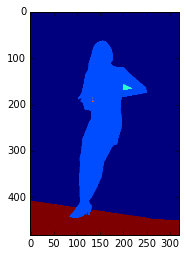

In [157]:
plt.imshow(mat['groundTruth'][0][1][0][0][0])

In [15]:
#print(mat['groundTruth'][0][1][0][0][0])

## Reading the training set

In [2]:
data_set = []
for filename in glob.glob('E:/TERM/TERM8/Pattern Recognition/Assignments/Assignment2/BSR/BSDS500/data/images/train/*.jpg'):
    image=Image.open(filename)
    #pix = im.load()
    #print(pix[480, 320])
    #plt.imshow(im)
    #plt.show()
    
    image_pixels_vector = np.asarray(image).reshape(-1)
    data_set.append(image_pixels_vector)
    
    #print(im)
    #print(len(im))

data_set = np.array(data_set)
#print(len(data_set))
data_set = data_set.reshape((154401 * len(data_set), 3))
print(data_set)

data_set = np.unique(data_set, axis=0)

[[101 119  97]
 [107 122 101]
 [109 122 102]
 ...
 [ 41  72  28]
 [ 48  75  34]
 [ 55  81  36]]


In [3]:
print(len(data_set))
print(data_set)
#print(data_set[1])
#print(data_set[2])

1260703
[[  0   0   0]
 [  0   0   2]
 [  0   0   4]
 ...
 [255 255 251]
 [255 255 253]
 [255 255 255]]


## Segmentation using K-means

In [6]:
def k_means(k, data_set):
    
    centroids_difference = 10000 
    
    new_centroids = []
    for i in range(k):
        #new_centroids.append(np.random.randint(150, size=3))
        new_centroids.append(data_set[i])
        
        print(new_centroids)
        
    while(centroids_difference > 0.001):
        clusters = [[] for i in range(k)]
        
        for i in range(len(data_set)):
            distances_from_centroids = []
            for j in range(k):
                distances_from_centroids.append(np.linalg.norm(new_centroids[j] - data_set[i]))
                #print(np.linalg.norm(new_centroids[j] - data_set[i]))
        
            cluster_index = distances_from_centroids.index(min(distances_from_centroids))
            clusters[cluster_index].append(data_set[i])
            
            
        old_centroids = new_centroids[:]
        for i in range(k):
            new_centroids[i] = np.mean(clusters[i] , axis=0)
          
        
        centroids_difference = 0
        for i in range(k):
            if(len(new_centroids[i]) == 0):
                new_centroids[i] = [0] * len(data_set[0])
            centroids_difference += np.abs(np.linalg.norm(old_centroids[i]) - np.linalg.norm(new_centroids[i]))
        
        print(centroids_difference)
        
        print('lol')
       
    return clusters, new_centroids

In [7]:
#clusters_number = [3,5,7,9,11]
#for k in clusters_number:
clusters, cluster_color = k_means(3, data_set)

[array([0, 0, 0], dtype=uint8)]
[array([0, 0, 0], dtype=uint8), array([0, 0, 2], dtype=uint8)]
[array([0, 0, 0], dtype=uint8), array([0, 0, 2], dtype=uint8), array([0, 0, 4], dtype=uint8)]
513.524735444308
lol
89.79257275142947
lol
51.84729087032959
lol
28.710124029752578
lol
17.103115531680558
lol
10.769767386424832
lol
7.186366334901109
lol
5.1757305757347325
lol
3.9892764371400347
lol
3.2081858331942215
lol
2.6535147630349343
lol
2.218243203388994
lol
1.8382033058798726
lol
1.5187466151377151
lol
1.258954639448291
lol
1.039371400443443
lol
0.8568988176795784
lol
0.7048670856656543
lol
0.5971950473628453
lol
0.4738911965655461
lol
0.3931548525901718
lol
0.3158588211317408
lol
0.2650911232055506
lol
0.20842051428404318
lol
0.16571832599538538
lol
0.1365921359151514
lol
0.11048789495372091
lol
0.0994950784997144
lol
0.08333729797135447
lol
0.06581250689914953
lol
0.05215017461318894
lol
0.038781672673550815
lol
0.032938779891040326
lol
0.030266318799164083
lol
0.024364874404000147
lol


In [14]:
for i in range(3):
    print(len(clusters[i]))

414777
404009
441917


In [23]:
pixil_color_map = {}
for i in range(len(clusters)):
    for point in clusters[i]:
        pixil_color_map.update({str(point) : cluster_color[i]})

In [25]:
image_RGB_pixels = data_set[0:][0:]
image_pixels = []
for i in range(len(image_RGB_pixels)):
    RGB = pixil_color_map.get(str(image_RGB_pixels[i]))
    image_pixels.append(RGB[0] * 256**2 + RGB[1]*256 + RGB[2])

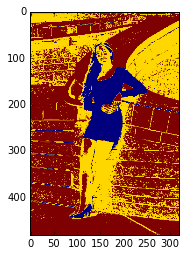

In [27]:
cluster_color_image = (np.array(image_pixels)).reshape((481, 321))
plt.imshow(cluster_color_image)

## Creating the partitioning & clustering

In [208]:
def partitioning(ground_truth):
    ground_truth = ground_truth.reshape(-1)
    unique_values = list(set(ground_truth))
    
    partitioning_num = len(unique_values)
    partitioning = [[] for i in range(partitioning_num)]
    
    uniqueValue_partitioningIndex_map = {}
   
    for i in range(partitioning_num):
        uniqueValue_partitioningIndex_map.update({str(unique_values[i]) : i})
        
        
    for i in range(len(ground_truth)):
        partition_index = uniqueValue_partitioningIndex_map.get(str(ground_truth[i]))
        partitioning[partition_index].append(i)
        
    return partitioning

In [209]:
partitioning = partitioning(mat['groundTruth'][0][1][0][0][0])

## Conditional Entropy Measure

In [214]:
def conditional_entropy_measure(partitioning, clustering):
    
    contingency_table = create_contingency_table(partitioning, pixel_clusters)
    
    conditional_entropy = 0
    
    for i in range(len(contingency_table[:,0])):
        for j in range(len(contingency_table[0])):
            if(contingency_table[i][j] != 0):
                conditional_entropy += (contingency_table[i][j] / 154401.0) * np.log10(contingency_table[i][j] / len(clustering[i]))
            #print(len(clustering[i]))
            #print(np.log10(contingency_table[i][j] / len(clustering[i])))
            
    conditional_entropy *= -1
    
    return conditional_entropy

In [211]:
def create_contingency_table(partitioning, clustering):
    contingency_table = np.zeros((len(clustering), len(partitioning)))
    
    for i in range(len(clustering)):
        for j in range(len(clustering[i])):
            for k in range(len(partitioning)):
                if(clustering[i][j] in partitioning[k]):
                    contingency_table[i][k] += 1
                    break
    #print(contingency_table)
    return contingency_table

In [215]:
#write a more general function to get the clustering of an image and choose it ground truth
#the function first will get the data of the image as a single nubmer of a pixel
#loop to get the clusters of each pixel, so each cluster will contains the index of pixels that are at the same cluster
#that will be the clustering of that image
#the partitioning is the same way for the grround truth matrix (the problem is how to get the ground truth image ??!!)

conditional_entropy_measure(partitioning, pixel_clusters)

0.24715354363673919

## Segmentation using Normalized Cut

In [5]:
def spectral_clustring_kNN_similarity(k, KNN_similarity_matrix, data_set):
    
    degree_list = []
    
    for i in range(len(data_set)):
        degree_list.append(sum(KNN_similarity_matrix[i]))
        
    #print(degree_list)
    degree_matrix = np.diag(degree_list)
        
        
        
    laplacian_matrix = degree_matrix - KNN_similarity_matrix
    
    degree_matrix_inverse = np.linalg.inv(degree_matrix)
    
    normalized_asymmetric_laplacian_matrix = np.matmul(degree_matrix_inverse, laplacian_matrix)
    
    eigenvalues, eigenvectors = np.linalg.eigh(normalized_asymmetric_laplacian_matrix)
    
    #print(eigenvalues)
    
    U_matrix = eigenvectors[:,:k]
    
    
    Y_matrix = [0] * k
    for i in range(len(data_matrix)):
        Y_matrix = np.vstack([Y_matrix, (U_matrix[i] / np.linalg.norm(U_matrix[i]))])
    Y_matrix = Y_matrix[1: , 0:]
        
    return Y_matrix
    #fig = plt.figure()
    #ax = fig.add_subplot(111,projection='3d')
    #ax.scatter(Y_matrix[:,0], Y_matrix[:,1], Y_matrix[:,2])

In [6]:
def KNN_similarity(knn, data_set):
    tree = KDTree(data_set, leaf_size=10)
    dist, KNNindexs = tree.query(data_set, k=knn)
    KNN_similarity_matrix = []
    for i in range(len(KNNindexs)):
        fiveNN_similarity_vector = [0] * len(data_set[:,0])
        for j in range(knn):
            fiveNN_similarity_vector[j] = 1
            
        KNN_similarity_matrix.append(fiveNN_similarity_vector)
            
    return KNN_similarity_matrix

In [ ]:
KNN_similarity_matrix = KNN_similarity(5, data_set)

In [ ]:
Y_matrix = spectral_clustring_kNN_similarity(5, KNN_similarity_matrix, data_set)